<a href="https://colab.research.google.com/github/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX_Trading_candle_stick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Candle Stick Classifiaction
* In financial technical analysis, a candlestick pattern is a movement in prices shown graphically on a candlestick chart that some believe can predict a particular market movement.
* Candlesticks are graphical representations of price movements for a given period of time. They are commonly formed by the opening, high, low, and closing prices of a financial instrument.

For more , check url : https://en.wikipedia.org/wiki/Candlestick_pattern

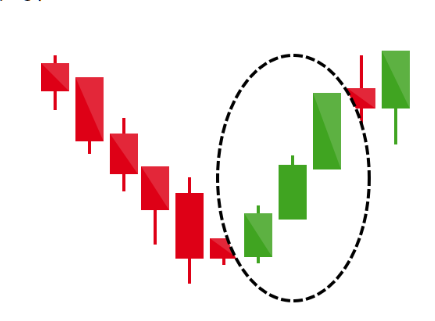

# **Objective** , **Target** , **Goal** and Steps

### Main Objective
* Candle Stick Classifiaction
* The model should detect whether the image is Downside or Upside
* identify the increase and decrease by seeing the image
* Predict the image by building model

### Target
* Make an effective model so that it can predict the right image
* Increase the accuracy and decrease the loss

### Steps
* Download the Data from github
* load the image
* Make a  normal model
* Will Use the Transfer learning  

### Goal

* Learn new things
* Be pretient and Be consistance
* Learn Experiment , Experiment and Experiment
* Face the mistake and error , Solving that with not destroying the laptop or keyboard  
* Write Code and  learn Code

# Downloading  Data Set From Github
* Getting Data set from Github .
* Url for the DataSet : [Link ](https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX%20Trading/candle_stick.zip)
* Get the Candle_stick.zip link from the GitHub
* Download the Candle_stick.zip and Upload to Colab File



###  Unzip the Zip file  
* After Download the candle_stick.zip , Upload it to Colab content
* Then unzip the file

```
!unzip /content/candle_stick.zip
```
* Copy the path of candle_stick.zip from Colab content
* Run it , And Find the folder
* And find the folder name : img_candel_stick



In [2]:
!unzip /content/candle_stick.zip

Archive:  /content/candle_stick.zip
replace img_candel_stick/Test/DOWN/Screenshot 2023-07-13 142105.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Exploring directory

In [3]:
!ls img_candel_stick/

Test  Train


In [4]:
#Train folder
!ls img_candel_stick/Train/

DOWN  UP


In [5]:
#Test folder
!ls img_candel_stick/Test/

DOWN  UP


In [6]:
#finding images
!ls img_candel_stick/Train/DOWN/


'Screenshot 2023-07-13 141425.png'  'Screenshot 2023-07-14 021259.png'
'Screenshot 2023-07-13 141443.png'  'Screenshot 2023-07-14 021334.png'
'Screenshot 2023-07-13 141456.png'  'Screenshot 2023-07-14 021349.png'
'Screenshot 2023-07-13 141509.png'  'Screenshot 2023-07-14 021403.png'
'Screenshot 2023-07-13 141530.png'  'Screenshot 2023-07-14 021418.png'
'Screenshot 2023-07-13 141941.png'  'Screenshot 2023-07-14 021454.png'
'Screenshot 2023-07-13 141954.png'  'Screenshot 2023-07-14 021530.png'
'Screenshot 2023-07-13 142105.png'  'Screenshot 2023-07-14 021551.png'
'Screenshot 2023-07-13 142143.png'  'Screenshot 2023-07-14 021605.png'
'Screenshot 2023-07-14 015427.png'  'Screenshot 2023-07-14 021632.png'
'Screenshot 2023-07-14 015455.png'  'Screenshot 2023-07-14 021648.png'
'Screenshot 2023-07-14 015514.png'  'Screenshot 2023-07-14 021724.png'
'Screenshot 2023-07-14 015543.png'  'Screenshot 2023-07-14 021749.png'
'Screenshot 2023-07-14 015609.png'  'Screenshot 2023-07-14 021821.png'
'Scree

###  Counting directory and image

In [7]:
import os

for dirpath , dir_num , file_num in os.walk("img_candel_stick"):
  print(f"There are {len(dir_num)} directories and {len(file_num)} images in  ' {dirpath} ' ")

There are 2 directories and 0 images in  ' img_candel_stick ' 
There are 2 directories and 0 images in  ' img_candel_stick/Test ' 
There are 0 directories and 36 images in  ' img_candel_stick/Test/UP ' 
There are 0 directories and 36 images in  ' img_candel_stick/Test/DOWN ' 
There are 2 directories and 0 images in  ' img_candel_stick/Train ' 
There are 0 directories and 120 images in  ' img_candel_stick/Train/UP ' 
There are 0 directories and 120 images in  ' img_candel_stick/Train/DOWN ' 


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("img_candel_stick/Train/DOWN/"))

num_steak_images_train

120

# Getting the class names or finding label name

In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("img_candel_stick/Train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['DOWN' 'UP']


# Image Load

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os


In [11]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class) # Changed
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


### Image loading of *Down* folder

Image shape: (312, 257, 4)


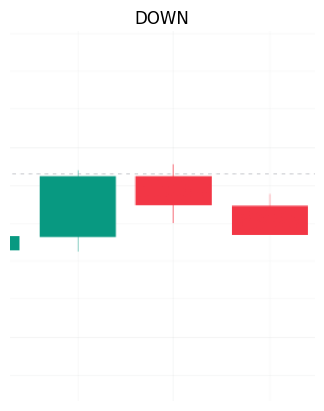

In [12]:

img = view_random_image(target_dir="img_candel_stick/Train/",
                        target_class="DOWN")

### Image loading of *UP* folder

Image shape: (611, 498, 4)


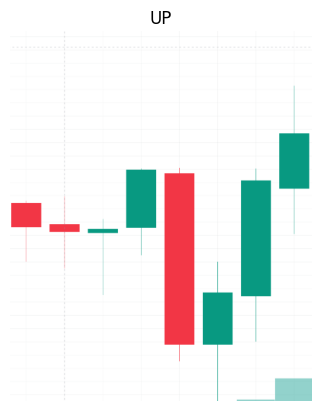

In [13]:
img = view_random_image(target_dir="img_candel_stick/Train/",
                        target_class="UP")

## Making a function to see random image from directory and target class

In [14]:
def random_view(T_target_dir , T_target_class  , Te_target_dir , Te_target_class ):
  plt.figure(figsize=(16,10))
  for i in range(12):
    ax=plt.subplot( 6 ,2 ,i+1 )
    if(i%2==1):
      view_random_image(T_target_dir, T_target_class)
    else:
      view_random_image(Te_target_dir, Te_target_class)



Image shape: (517, 592, 4)
Image shape: (387, 851, 4)
Image shape: (222, 456, 4)
Image shape: (703, 1532, 4)
Image shape: (573, 737, 4)
Image shape: (667, 702, 4)
Image shape: (348, 445, 4)
Image shape: (637, 992, 4)
Image shape: (667, 1107, 4)
Image shape: (703, 1532, 4)
Image shape: (423, 1062, 4)
Image shape: (198, 178, 4)


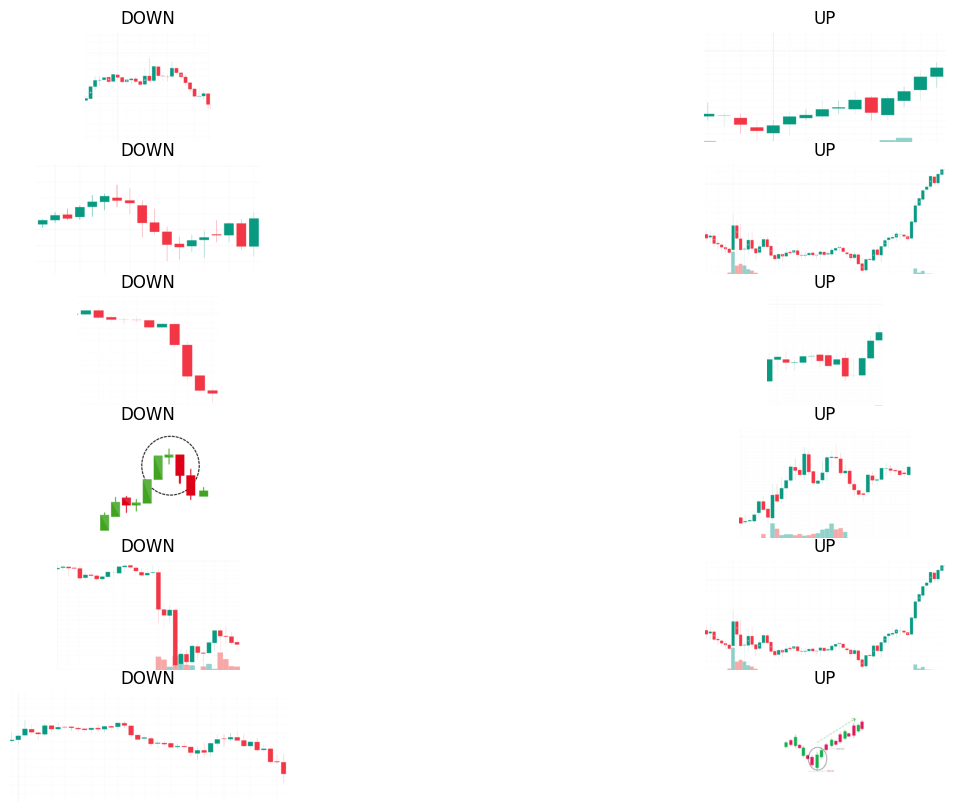

In [15]:
 random_view("img_candel_stick/Train/","UP","img_candel_stick/Train/", "DOWN" )

# Making Raw CNN model

### 1. Finding img shape

Image shape: (312, 345, 4)


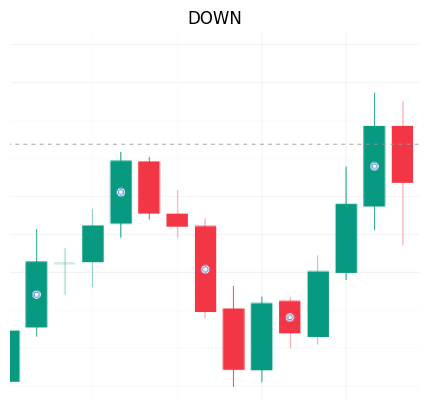

In [16]:
img = view_random_image(target_dir="img_candel_stick/Train/",
                        target_class="DOWN")

In [17]:
img.shape

(312, 345, 4)

In [18]:
img

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

### 2. Train and Split image  

In [19]:
train_dir = "img_candel_stick/Train/"
test_dir = "img_candel_stick/Test/"

### 3. Making the folder prepared for the model

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)


# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen =  ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 240 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


### Model_1

In [21]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 15s 437ms/step - loss: 0.7090 - accuracy: 0.5417 - val_loss: 0.6733 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 2s 223ms/step - loss: 0.5921 - accuracy: 0.7625 - val_loss: 0.4609 - val_accuracy: 0.8472
Epoch 3/5
8/8 [==============================] - 2s 225ms/step - loss: 0.3659 - accuracy: 0.8958 - val_loss: 0.3483 - val_accuracy: 0.8472
Epoch 4/5
8/8 [==============================] - 2s 218ms/step - loss: 0.2837 - accuracy: 0.8875 - val_loss: 0.3237 - val_accuracy: 0.8611
Epoch 5/5
8/8 [==============================] - 2s 230ms/step - loss: 0.2244 - accuracy: 0.9250 - val_loss: 0.3105 - val_accuracy: 0.8750


In [22]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 4. History of model 1

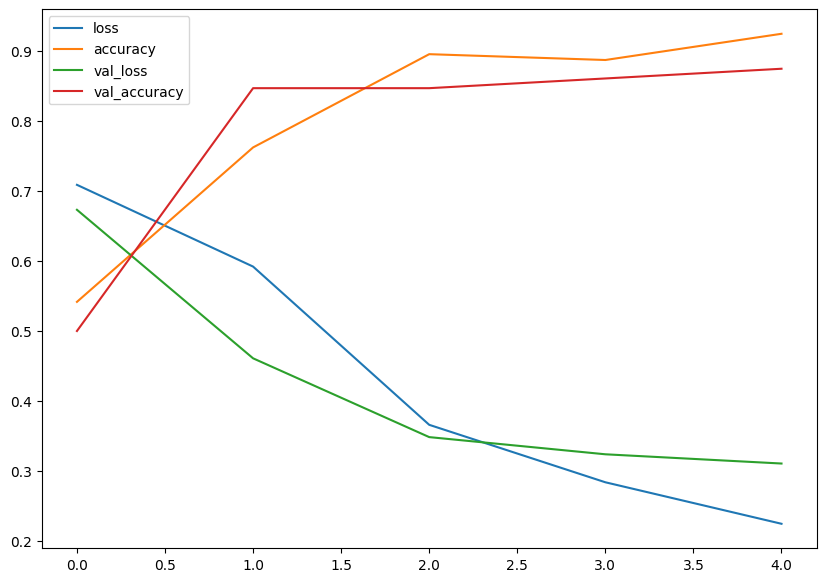

In [23]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

### Making a History function

In [24]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

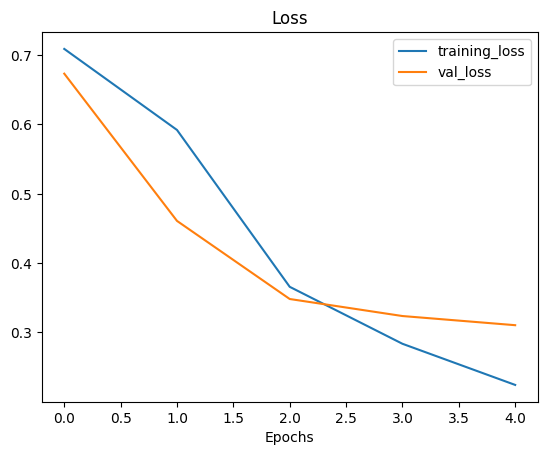

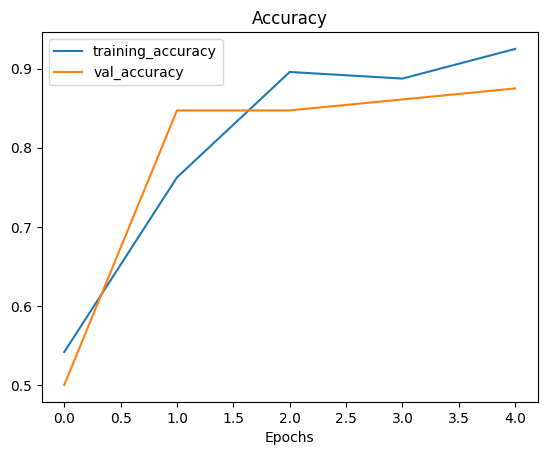

In [25]:
plot_loss_curves(history_1)

# Improving Model with Data augmentation

In [26]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

### Here Shuffle is false

In [27]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 240 images belonging to 2 classes.
Non-augmented training images:
Found 240 images belonging to 2 classes.
Unchanged test images:
Found 72 images belonging to 2 classes.


###  Get data batch samples

In [28]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

### Show original image and augmented image

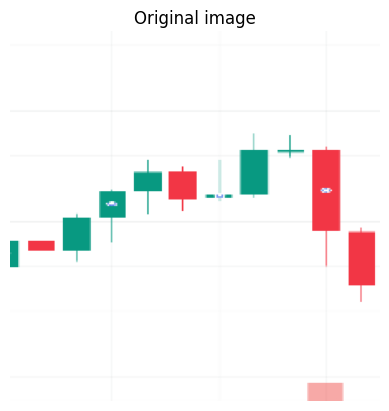

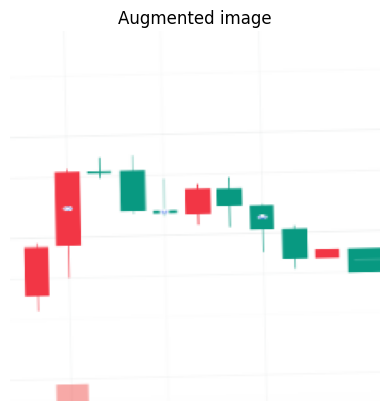

In [29]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance

plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# Making new model for data augmentation

### Model_2

In [30]:
# Creating model

model_2= tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(10 ,3, activation="relu" , input_shape=(224, 224, 3)) ,
     tf.keras.layers.MaxPool2D(pool_size=2) ,# reduce number of features by half
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(1, activation='sigmoid')


])


# Compile the model
model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
8/8 [==============================] - 7s 545ms/step - loss: 0.6978 - accuracy: 0.3417 - val_loss: 0.6932 - val_accuracy: 0.4861
Epoch 2/5
8/8 [==============================] - 4s 482ms/step - loss: 0.6931 - accuracy: 0.4958 - val_loss: 0.6886 - val_accuracy: 0.7083
Epoch 3/5
8/8 [==============================] - 4s 510ms/step - loss: 0.6887 - accuracy: 0.6750 - val_loss: 0.6821 - val_accuracy: 0.7361
Epoch 4/5
8/8 [==============================] - 4s 470ms/step - loss: 0.6843 - accuracy: 0.6875 - val_loss: 0.6723 - val_accuracy: 0.7500
Epoch 5/5
8/8 [==============================] - 5s 614ms/step - loss: 0.6760 - accuracy: 0.6833 - val_loss: 0.6476 - val_accuracy: 0.7917


### History of model 2 and shuffle is fales

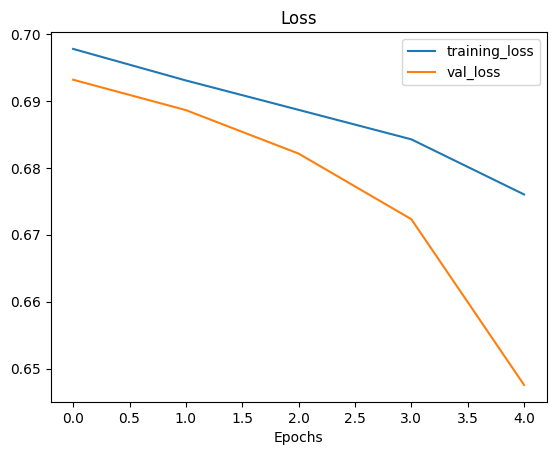

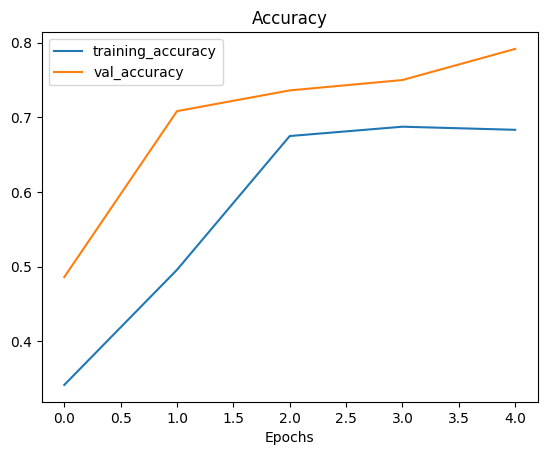

In [31]:
plot_loss_curves(history_2)

# Tring to Improve the model 2  by shuffel ture

In [32]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 240 images belonging to 2 classes.


### Model_3 shuffel true

In [33]:
# Creating model

model_3= tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(10 ,3, activation="relu" , input_shape=(224, 224, 3)) ,
     tf.keras.layers.MaxPool2D(pool_size=2) ,# reduce number of features by half
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Conv2D(10 ,3, activation="relu" ) ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(1, activation='sigmoid')


])


# Compile the model
model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
8/8 [==============================] - 6s 460ms/step - loss: 0.6998 - accuracy: 0.5292 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 6s 779ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 4s 506ms/step - loss: 0.6884 - accuracy: 0.5042 - val_loss: 0.6818 - val_accuracy: 0.5694
Epoch 4/5
8/8 [==============================] - 5s 558ms/step - loss: 0.6792 - accuracy: 0.6667 - val_loss: 0.6717 - val_accuracy: 0.6667
Epoch 5/5
8/8 [==============================] - 4s 472ms/step - loss: 0.6706 - accuracy: 0.6875 - val_loss: 0.6560 - val_accuracy: 0.6667


### History of model 3

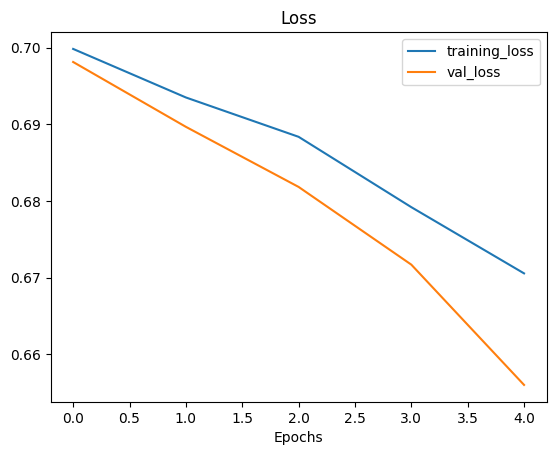

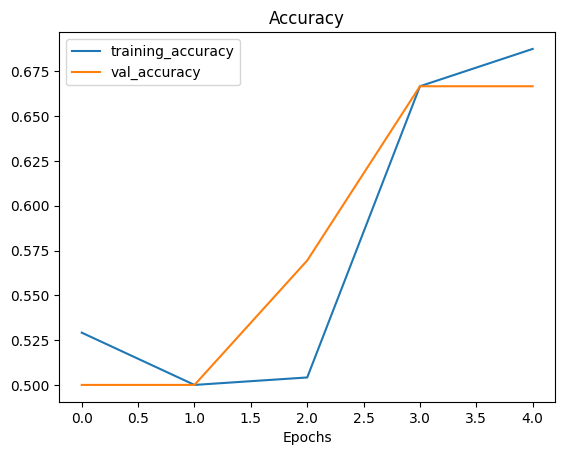

In [34]:
plot_loss_curves(history_3)

### Making a comparing history function

In [35]:
import matplotlib.pyplot as plt

def plot_compare_history(histories):
    """
    Plots separate loss curves for training and validation metrics for multiple histories.
    """
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define colors for each history

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    for i, history in enumerate(histories):
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']

        epochs = range(len(history.history['loss']))

        # Plot loss
        ax1.plot(epochs, loss, label=f'Training Loss {i+1}', color=colors[i])
        ax1.plot(epochs, val_loss, label=f'Validation Loss {i+1}', linestyle='--', color=colors[i])
        ax1.set_title('Loss')
        ax1.set_xlabel('Epochs')
        ax1.legend()

        # Plot accuracy
        ax2.plot(epochs, accuracy, label=f'Training Accuracy {i+1}', color=colors[i])
        ax2.plot(epochs, val_accuracy, label=f'Validation Accuracy {i+1}', linestyle='--', color=colors[i])
        ax2.set_title('Accuracy')
        ax2.set_xlabel('Epochs')
        ax2.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


## History Compare info part 1

### Info

* **History 2** is **Model 2** and  **Shuffle is False**
* **History 3** is **Model 3** and  **Shuffle is True**

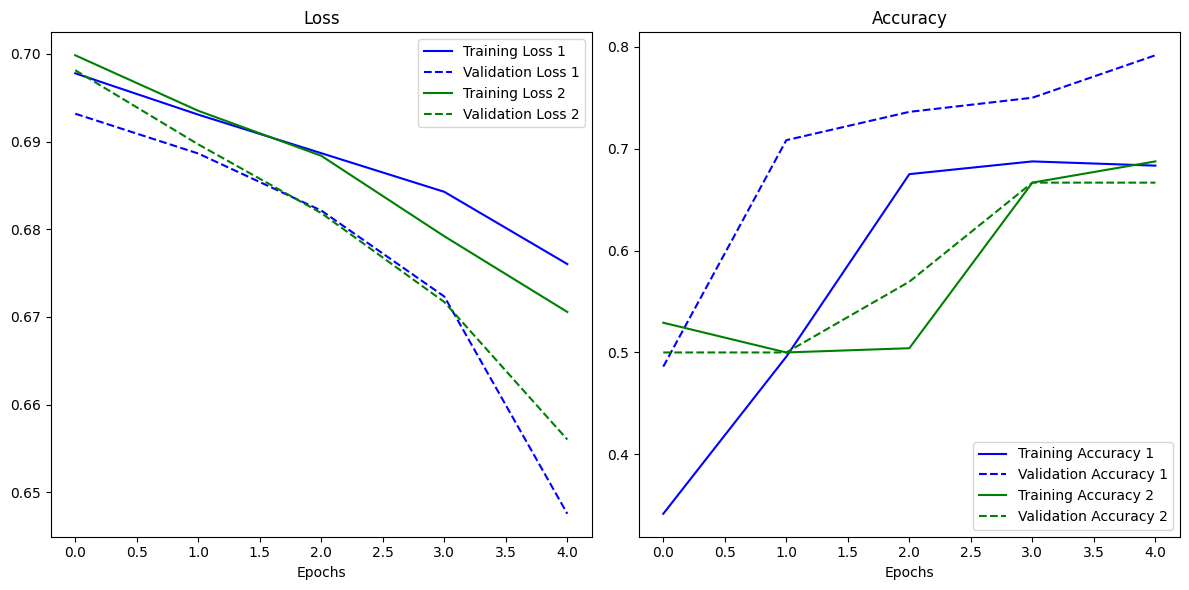

In [36]:
histories = [ history_2, history_3]
plot_compare_history(histories)

## History Compare info part 2

### Info

* **History 1** is **Model 1**
* **History 3** is **Model 3** and  **Shuffle is True**

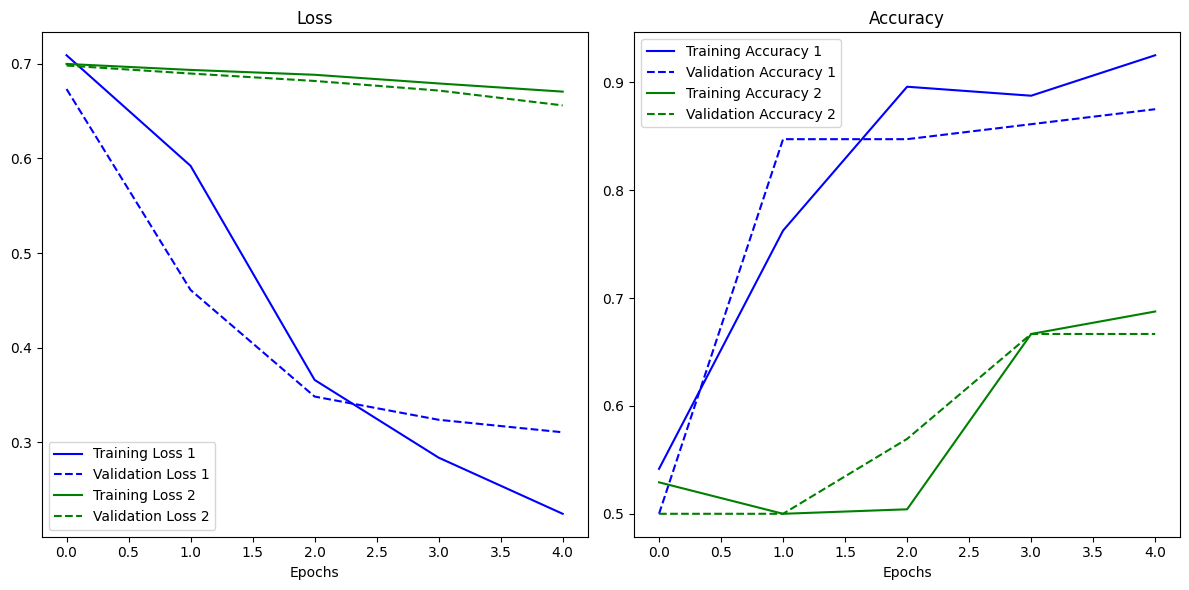

In [37]:
histories = [ history_1, history_3]
plot_compare_history(histories)

# Report 1

*  Without Data augmentation the model is doing well .
*  Both shuffle ture or false model is performing  Not Good ( model 2 , model_3 )

# Improving model_1 by making a new one and increasing the epoch layers, learning rate number

## Model_4 ( Increasing epochs number )
`

In [38]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_4_e = model_4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
8/8 [==============================] - 5s 264ms/step - loss: 2.1174 - accuracy: 0.2333 - val_loss: 0.8126 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 2s 232ms/step - loss: 0.7519 - accuracy: 0.5000 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 2s 227ms/step - loss: 0.6888 - accuracy: 0.5833 - val_loss: 0.6650 - val_accuracy: 0.7361
Epoch 4/10
8/8 [==============================] - 2s 230ms/step - loss: 0.6520 - accuracy: 0.8083 - val_loss: 0.6370 - val_accuracy: 0.6944
Epoch 5/10
8/8 [==============================] - 2s 281ms/step - loss: 0.6600 - accuracy: 0.5458 - val_loss: 0.6082 - val_accuracy: 0.7917
Epoch 6/10
8/8 [==============================] - 2s 292ms/step - loss: 0.6580 - accuracy: 0.5833 - val_loss: 0.5759 - val_accuracy: 0.8056
Epoch 7/10
8/8 [==============================] - 2s 230ms/step - loss: 0.6352 - accuracy: 0.5875 - val_loss: 0.5345 - val_accuracy: 0.8194
Epoch 8/10
8/8 [====

## Model_4 ( Increasing layers number )

In [39]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                                       padding="valid"), # padding can also be 'same'


  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_4_l = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 11s 513ms/step - loss: 0.6943 - accuracy: 0.4625 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 2s 271ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 2s 226ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 2s 237ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 2s 243ms/step - loss: 0.6935 - accuracy: 0.2375 - val_loss: 0.6931 - val_accuracy: 0.5417


## Model_4 ( Increasing learing rate )

In [40]:
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # Default , learning_rate: float = 0.001
              metrics=["accuracy"])

# Fit the model
history_4_lr = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
8/8 [==============================] - 4s 287ms/step - loss: 1.1203 - accuracy: 0.4875 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 2s 313ms/step - loss: 0.6759 - accuracy: 0.5083 - val_loss: 0.6614 - val_accuracy: 0.8889
Epoch 3/5
8/8 [==============================] - 2s 225ms/step - loss: 0.6533 - accuracy: 0.8125 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 2s 235ms/step - loss: 0.7214 - accuracy: 0.5875 - val_loss: 0.6015 - val_accuracy: 0.8611
Epoch 5/5
8/8 [==============================] - 2s 224ms/step - loss: 0.5536 - accuracy: 0.8708 - val_loss: 0.4541 - val_accuracy: 0.9306


### Comparing model 4

(  Here , Model_1 was chosen for the experiment  )

* **history_4_e** is **Model 4** and  epochs was increased from  5 to 10
* **history_4_l** is **Model 4** and layer was increased  from 8 to 19
* **history_4_lr** is **Model 4** and Learning rate was increased  from 0.001 to 0.001

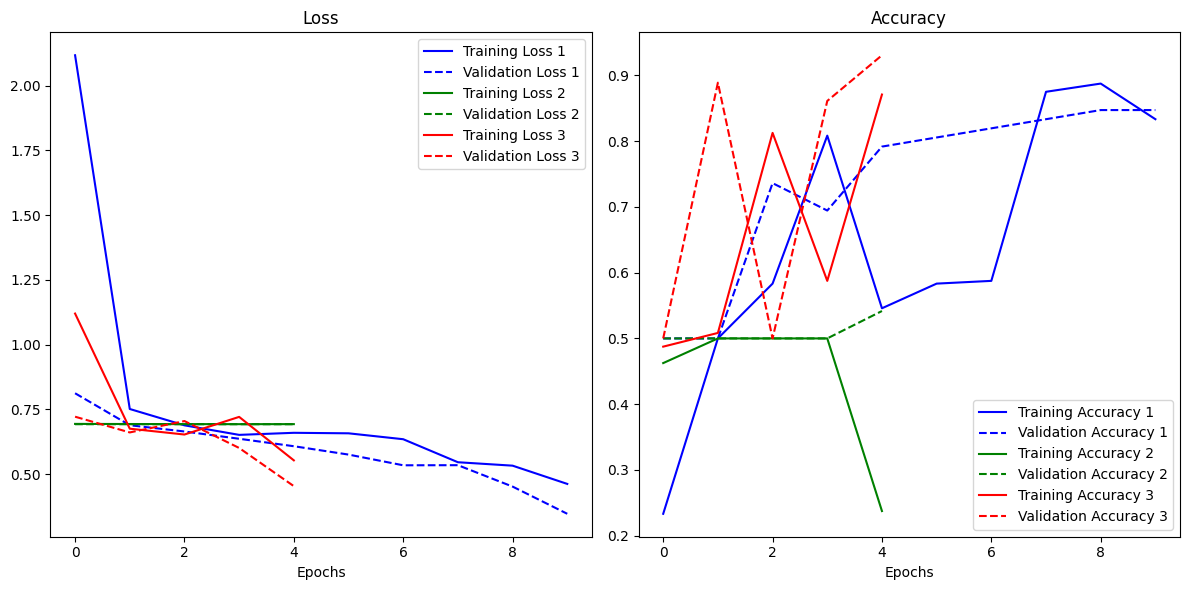

In [41]:
histories = [ history_4_e, history_4_l ,history_4_lr]
plot_compare_history(histories)

# Report 2

* Model 1's epochs, layers, and learning rate were increased
* Model 1 performance may be improved by increasing epochs and learning rate.

# Creating a new model based on model 4's knowledge



### Model_5

* increasing the number of layers, epochs, and learning rate

In [42]:
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0003),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/15
8/8 [==============================] - 6s 297ms/step - loss: 0.7992 - accuracy: 0.4167 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 2s 219ms/step - loss: 0.6857 - accuracy: 0.6625 - val_loss: 0.6645 - val_accuracy: 0.7361
Epoch 3/15
8/8 [==============================] - 2s 225ms/step - loss: 0.6638 - accuracy: 0.6833 - val_loss: 0.6454 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 2s 228ms/step - loss: 0.6054 - accuracy: 0.7167 - val_loss: 0.5502 - val_accuracy: 0.8472
Epoch 5/15
8/8 [==============================] - 2s 259ms/step - loss: 0.5064 - accuracy: 0.8292 - val_loss: 0.3799 - val_accuracy: 0.8611
Epoch 6/15
8/8 [==============================] - 2s 272ms/step - loss: 0.3288 - accuracy: 0.8750 - val_loss: 0.3774 - val_accuracy: 0.7917
Epoch 7/15
8/8 [==============================] - 2s 218ms/step - loss: 0.5515 - accuracy: 0.8042 - val_loss: 0.3763 - val_accuracy: 0.8611
Epoch 8/15
8/8 [====

### History of Model 5

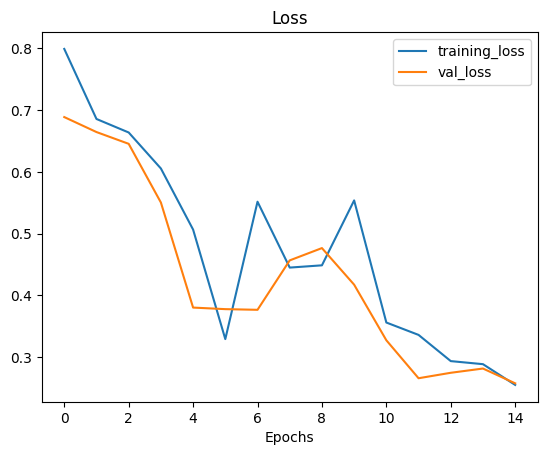

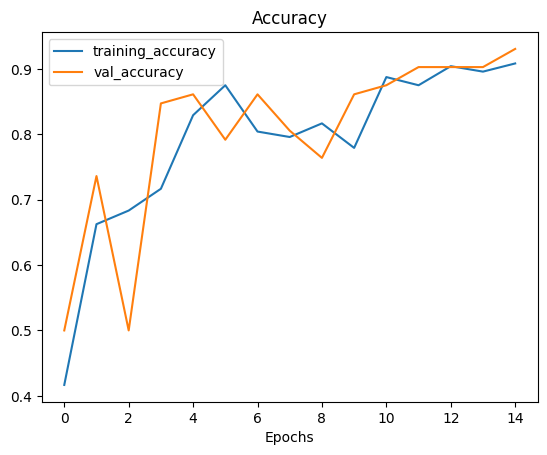

In [43]:
plot_loss_curves(history_5)

# Report 3

* Model 5 was Great
* But the validation loss is abnormanl
* train loss and validation loss has a big difference

# Creating a new model based on model 5's knowledge

### Model_6

In [58]:
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/25
8/8 [==============================] - 4s 252ms/step - loss: 0.7549 - accuracy: 0.5542 - val_loss: 0.6882 - val_accuracy: 0.6944
Epoch 2/25
8/8 [==============================] - 2s 232ms/step - loss: 0.6866 - accuracy: 0.7375 - val_loss: 0.6728 - val_accuracy: 0.8194
Epoch 3/25
8/8 [==============================] - 2s 316ms/step - loss: 0.6676 - accuracy: 0.8125 - val_loss: 0.6325 - val_accuracy: 0.8611
Epoch 4/25
8/8 [==============================] - 2s 221ms/step - loss: 0.6697 - accuracy: 0.5792 - val_loss: 0.5494 - val_accuracy: 0.8056
Epoch 5/25
8/8 [==============================] - 2s 217ms/step - loss: 0.5584 - accuracy: 0.8292 - val_loss: 0.4122 - val_accuracy: 0.8333
Epoch 6/25
8/8 [==============================] - 2s 238ms/step - loss: 0.4329 - accuracy: 0.8292 - val_loss: 0.3633 - val_accuracy: 0.8333
Epoch 7/25
8/8 [==============================] - 2s 210ms/step - loss: 0.3605 - accuracy: 0.8625 - val_loss: 0.3367 - val_accuracy: 0.8611
Epoch 8/25
8/8 [====

### History of Model 6

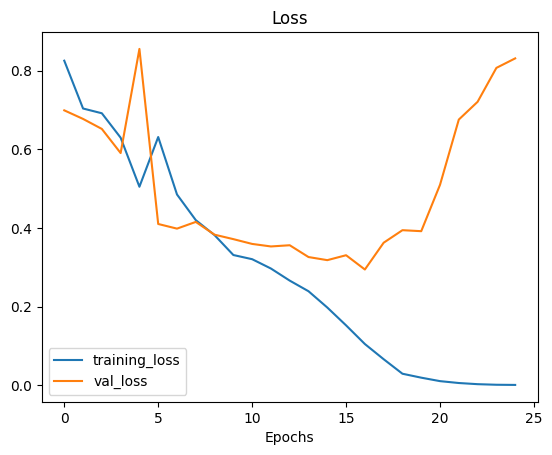

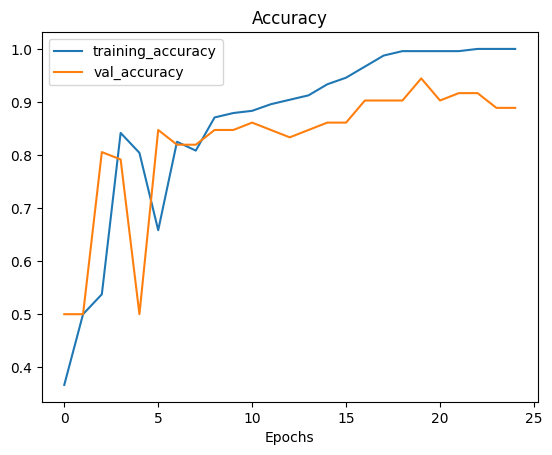

In [45]:
plot_loss_curves(history_6)

# Prediction

### Load and prepared image function

In [46]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

### Model and file show function for prediction

In [47]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

### This image was collected randomly from , Tradingview.com . image : Screenshot 2023-07-17 153241.png

* Url of image : https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX%20Trading/test_iamge/Screenshot%202023-07-17%20153241.png

* All the image can find here : https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/tree/main/FX%20Trading/test_iamge

1/1 [==============================] - 0s 364ms/step


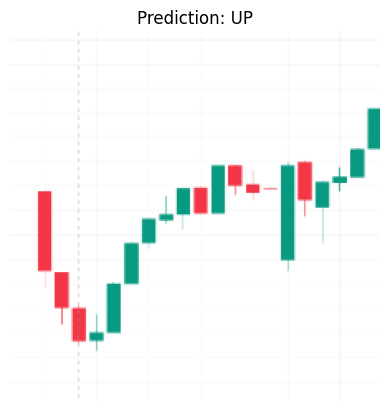

In [49]:
pred_and_plot(model_6, "Screenshot 2023-07-17 153241.png", class_names)

### Getting image from Github

* url : https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX%20Trading/test_iamge/test%20image%20.png

In [50]:
!wget https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX%20Trading/test_iamge/test%20image%20.png



--2023-07-17 18:53:46--  https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/blob/main/FX%20Trading/test_iamge/test%20image%20.png
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5403 (5.3K) [text/plain]
Saving to: ‘test image .png.1’

test image .png.1   100%[===================>]   5.28K  --.-KB/s    in 0s      

2023-07-17 18:53:46 (65.4 MB/s) - ‘test image .png.1’ saved [5403/5403]



### Predicting the image

1/1 [==============================] - 0s 18ms/step


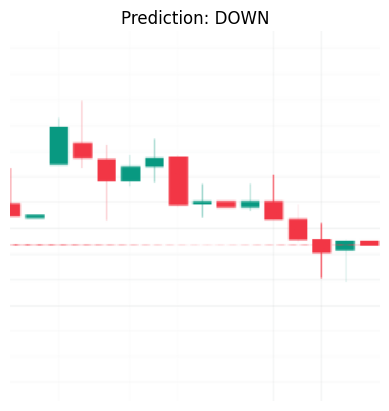

In [51]:
pred_and_plot(model_6, "Screenshot 2023-07-17 155647.png", class_names)

1/1 [==============================] - 0s 19ms/step


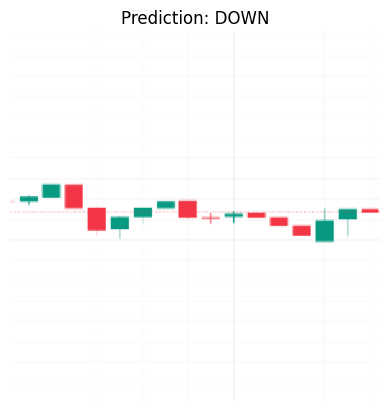

In [52]:
pred_and_plot(model_6, "Screenshot 2023-07-17 155859.png", class_names)

# Download the model_6

* Here , You can find all the models . URL :https://github.com/farshid101/Real-life-Exclusive-Deep-learning-project/tree/main/FX%20Trading/Models

### Saving Model

In [66]:
model_6.save('Raw_model.h5')

### Loading model

1/1 [==============================] - 0s 87ms/step


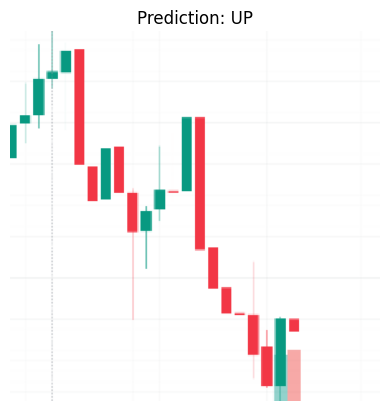

In [60]:
# Load the saved model
model = load_model('Raw_model.h5')

# Use the loaded model for predictions
pred_and_plot(model, "Screenshot 2023-07-17 182350.png", class_names)

# Transfer learning in Tensorflow

### Checking GPU

In [67]:
# Are we using a GPU?
!nvidia-smi

Mon Jul 17 19:31:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |   5005MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Create tensorboard callback

In [68]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Creating models using TensorFlow Hub
In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from TensorFlow Hub.



1. ResNetV2 - a state of the art computer vision model architecture from 2016.
2. EfficientNet - a state of the art computer vision architecture from 2019.



### import TensorFlow and TensorFlow Hub.

In [69]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

### Models url

In [70]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

### Creating model function

In [83]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary")


Training images:
Found 240 images belonging to 2 classes.
Testing images:
Found 72 images belonging to 2 classes.


In [76]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='sigmoid', name='output_layer') # create our own output layer
  ])

  return model

## Resnet_model

In [86]:
# Create model
resnet_model = create_model(resnet_url, num_classes=1)


# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


### Fit the model

In [88]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230717-195807
Epoch 1/10
8/8 [==============================] - 3s 278ms/step - loss: 0.4386 - accuracy: 0.8458 - val_loss: 0.4947 - val_accuracy: 0.8194
Epoch 2/10
8/8 [==============================] - 2s 230ms/step - loss: 0.4167 - accuracy: 0.8500 - val_loss: 0.4805 - val_accuracy: 0.8333
Epoch 3/10
8/8 [==============================] - 2s 241ms/step - loss: 0.3974 - accuracy: 0.8583 - val_loss: 0.4709 - val_accuracy: 0.8333
Epoch 4/10
8/8 [==============================] - 2s 248ms/step - loss: 0.3834 - accuracy: 0.8667 - val_loss: 0.4591 - val_accuracy: 0.8333
Epoch 5/10
8/8 [==============================] - 2s 235ms/step - loss: 0.3755 - accuracy: 0.8750 - val_loss: 0.4592 - val_accuracy: 0.8194
Epoch 6/10
8/8 [==============================] - 2s 302ms/step - loss: 0.3553 - accuracy: 0.8792 - val_loss: 0.4452 - val_accuracy: 0.8472
Epoch 7/10
8/8 [==============================] - 2s 254ms/step - loss: 0.3448 - accu

### Predict of Resnet_model

1/1 [==============================] - 0s 84ms/step


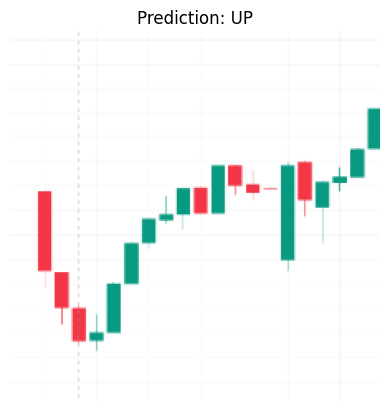

In [91]:
pred_and_plot( resnet_model, "Screenshot 2023-07-17 153241.png", class_names)

### Resnet_history

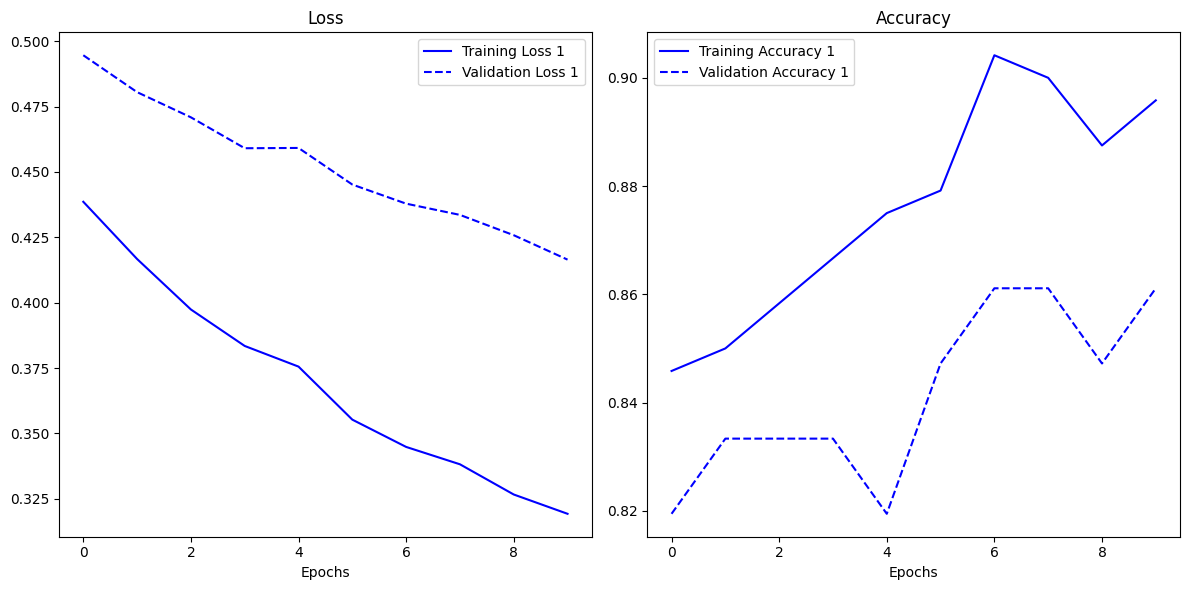

In [92]:
histories = [ resnet_history]
plot_compare_history(histories)

## Improving model by increasing epochs

In [95]:
# Fit the model
resnet_history_epochs = resnet_model.fit(train_data,
                                  epochs=25,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230717-200654
Epoch 1/25
8/8 [==============================] - 2s 233ms/step - loss: 0.3011 - accuracy: 0.9000 - val_loss: 0.4087 - val_accuracy: 0.8750
Epoch 2/25
8/8 [==============================] - 2s 246ms/step - loss: 0.2957 - accuracy: 0.9000 - val_loss: 0.4033 - val_accuracy: 0.8750
Epoch 3/25
8/8 [==============================] - 2s 256ms/step - loss: 0.2862 - accuracy: 0.9125 - val_loss: 0.3958 - val_accuracy: 0.8750
Epoch 4/25
8/8 [==============================] - 2s 232ms/step - loss: 0.2798 - accuracy: 0.9208 - val_loss: 0.3909 - val_accuracy: 0.8750
Epoch 5/25
8/8 [==============================] - 2s 236ms/step - loss: 0.2739 - accuracy: 0.9167 - val_loss: 0.3880 - val_accuracy: 0.8750
Epoch 6/25
8/8 [==============================] - 2s 238ms/step - loss: 0.2714 - accuracy: 0.9250 - val_loss: 0.3834 - val_accuracy: 0.8750
Epoch 7/25
8/8 [==============================] - 2s 245ms/step - loss: 0.2666 - accu

### Download

In [97]:
resnet_model.save('resnet_model_25_epochs.h5')

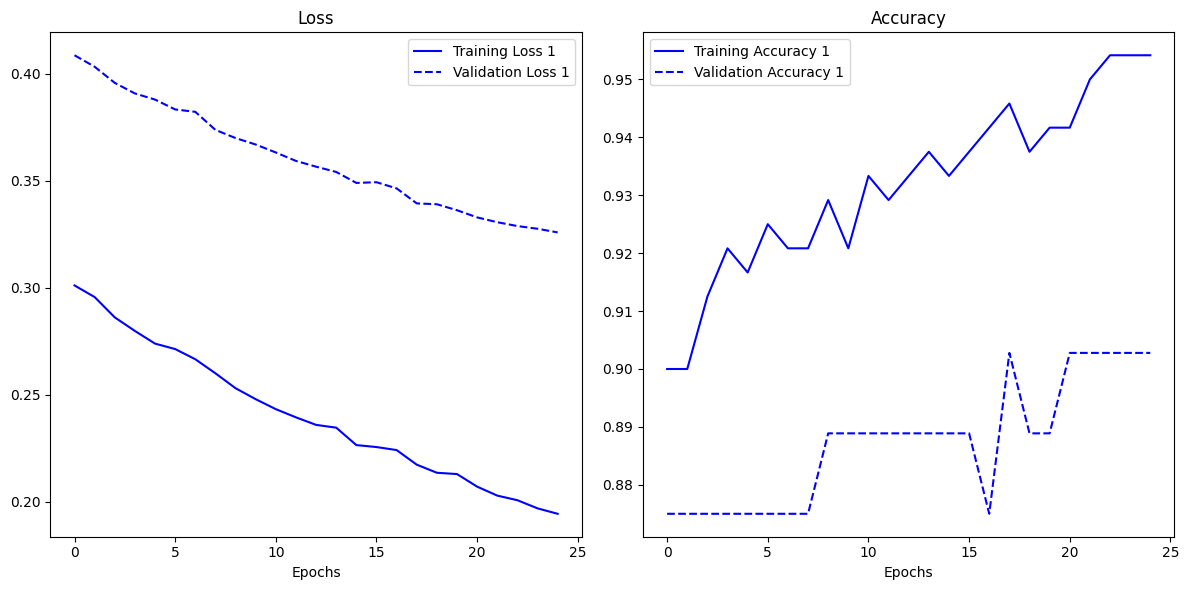

In [96]:

histories = [ resnet_history_epochs ]
plot_compare_history(histories)

### Prediction of model

1/1 [==============================] - 0s 26ms/step


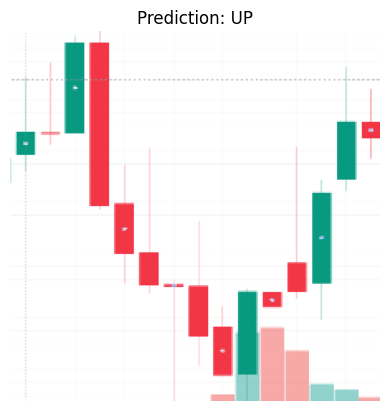

In [99]:
pred_and_plot( resnet_model, "Screenshot 2023-07-18 021441.png", class_names)

1/1 [==============================] - 0s 118ms/step


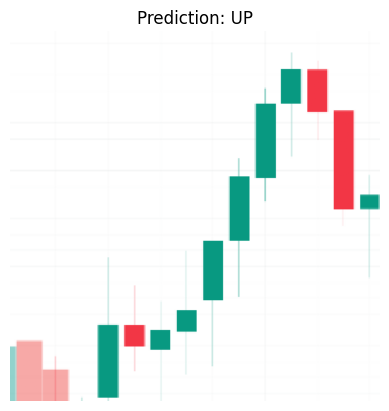

In [101]:
pred_and_plot( resnet_model, "test.png", class_names)

1/1 [==============================] - 0s 44ms/step


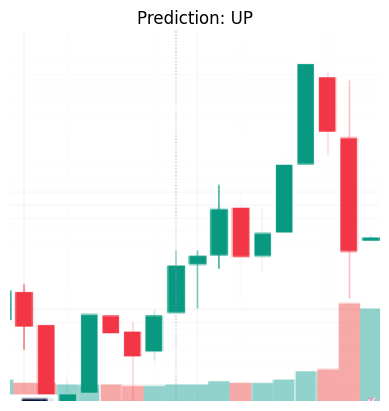

In [103]:
pred_and_plot( resnet_model, "1111.png", class_names)

1/1 [==============================] - 0s 22ms/step


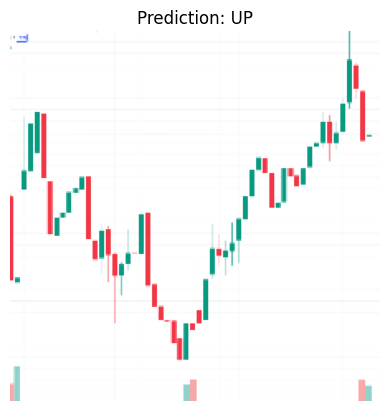

In [104]:
pred_and_plot( resnet_model, "2222.png", class_names)

# Aurthor

* Name : Farshid Hossain
* Github : https://github.com/farshid101
* Linkedin : https://www.linkedin.com/in/farshid-hossain-b67890218/
